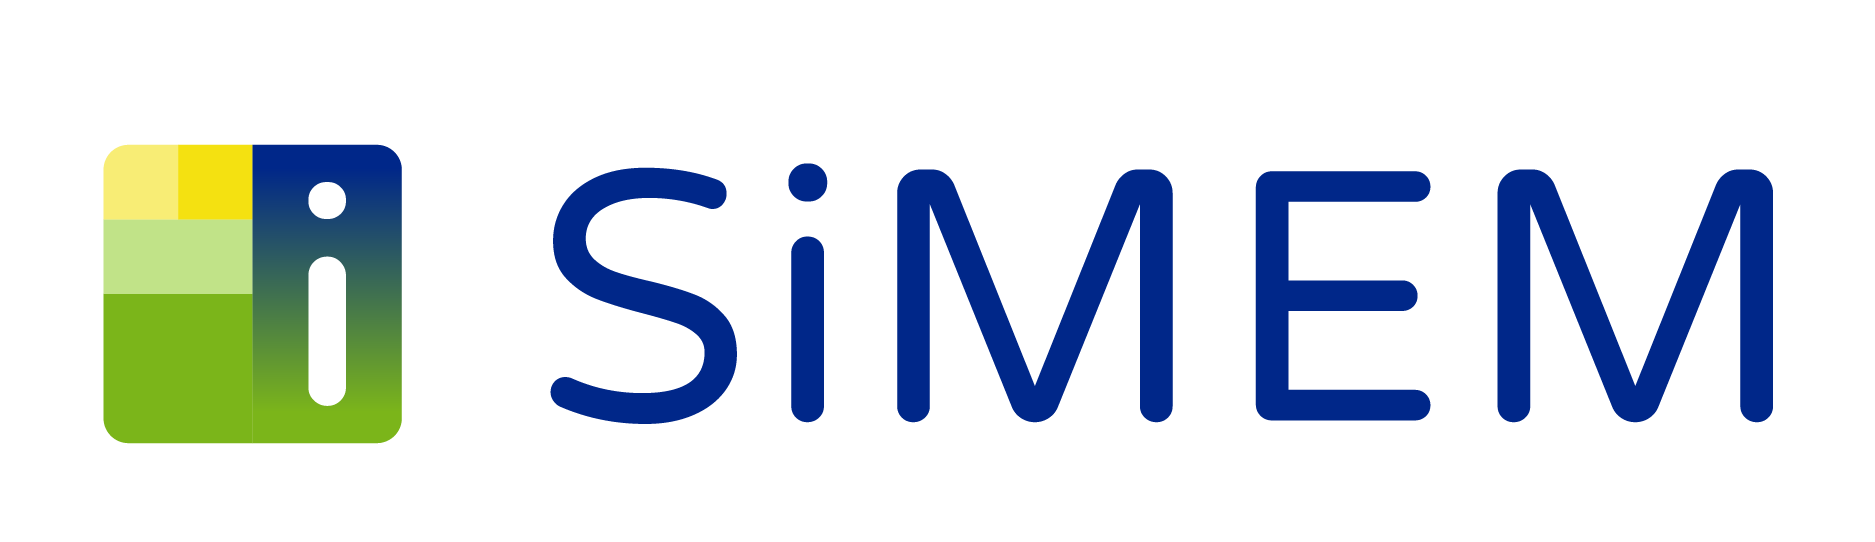

[SiMEM](https://www.simem.co/)

## Caso de uso - Proyecciones de las cantidades y precios en contratos de energía del mercado mayorista con destino al mercado regulado


# Objetivos de este notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto

**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)


<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [1]:
# !{sys.executable} -m pip install -U pydataxm

<a id='section2'></a>
# 2. Importación de librerías


In [2]:
import sys                                  # Proporciona acceso a variables y funciones del intérprete de Python
from pydataxm.pydatasimem import ReadSIMEM, VariableSIMEM   # Importa clases para interactuar con datos del sistema SIMEM
import pandas as pd                         # Librería para manipulación y análisis de datos en estructuras tipo DataFrame
import datetime as dt                       # Módulo para trabajar con fechas y horas
from datetime import timedelta              # Importa la clase timedelta para operaciones con diferencias de tiempo

# Importar librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo el conjunto a presentar es  [Proyecciones de las cantidades y precios en contratos de energía del Mercado Mayorista por comercializador](https://www.simem.co/datadetail/8d10e6f4-dfe4-409b-bc41-08dd3983a071).

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

In [3]:
id_dataset = '8d10e6'                                     # ID del conjunto de datos a consultar
fecha_inicial = '2025-06-01'                              # Fecha de inicio del rango de consulta
fecha_final = '2030-05-31'                                # Fecha de fin del rango de consulta
simem = ReadSIMEM(dataset_id=id_dataset, start_date=fecha_inicial, end_date=fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_dataset = simem.main()                      # Ejecución del método principal para obtener los datos en un DataFrame
df_dataset.head(5)                                     # Visualización de las primeras 20 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Proyecciones de las cantidades y precios en contratos de energía del Mercado Mayorista por comercializador"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0009179115295410156
Extraccion de registros: 7.6710875034332275
End of data extracting process
****************************************************************************************************


,FechaPublicacion,FechaProyectada,CodigoAgenteComprador,TipoMercado,Mecanismo,Cantidad,PPP
0,2025-01-01,2027-05-01,GNCC,Regulado,SICEP,41529764.0,307.6700
1,2025-01-01,2027-05-01,GNCC,No Regulado,Negociación Bilateral,57179144.0,278.3032
2,2025-01-01,2027-05-01,GECG,No Regulado,Negociación Bilateral,74400000.0,248.4326
3,2025-01-01,2027-05-01,GECC,No Regulado,Negociación Bilateral,110752232.0,290.6120
4,2025-01-01,2027-05-01,GCMG,No Regulado,Negociación Bilateral,24.0,231.9203


Consulta de listado de agentes para obtener su nombre

In [4]:
id_dataset = '972263'                                     # ID del conjunto de datos a consultar
fecha_inicial = '2025-06-20'                              # Fecha de inicio del rango de consulta
fecha_final = '2025-06-20'                                # Fecha de fin del rango de consulta
simem = ReadSIMEM(dataset_id=id_dataset, start_date=fecha_inicial, end_date=fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_agentes = simem.main()                      # Ejecución del método principal para obtener los datos en un DataFrame
df_agentes.head(5)                                     # Visualización de las primeras 20 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Listado de agentes registrados"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0002522468566894531
Extraccion de registros: 2.2346789836883545
End of data extracting process
****************************************************************************************************


,Fecha,CodigoDuracion,CodigoSICAgente,NombreAgente,ActividadAgente
0,2025-06-20,P1D,EPSD,CELSIA COLOMBIA S.A. E.S.P.,Distribuidor
1,2025-06-20,P1D,EBPD,EMPRESA DE ENERGIA DEL BAJO PUTUMAYO S.A. E.S.P.,Distribuidor
2,2025-06-20,P1D,HLAD,ELECTRIFICADORA DEL HUILA S.A. E.S.P.,Distribuidor
3,2025-06-20,P1D,CQTD,ELECTRIFICADORA DEL CAQUETA S.A. E.S.P.,Distribuidor
4,2025-06-20,P1D,DEGD,DESARROLLO ELECTRICO DEL RIO GUATAPURI SAS ESP,Distribuidor


<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

### Filtrar la máxima versión para el periodo de consulta de los datos, es decir, la fecha de publicación mas reciente de las proyecciones

In [18]:
df_trabajo = df_dataset.copy()                            # Copia del DataFrame original para trabajar con él
max_fecha_publicacion = df_trabajo['FechaPublicacion'].max()    # Obtención de la fecha de publicación más reciente
df_trabajo = df_trabajo[df_trabajo['FechaPublicacion'] == max_fecha_publicacion]  # Filtrado de datos por fecha de publicación
df_trabajo.head()

,FechaPublicacion,FechaProyectada,CodigoAgenteComprador,TipoMercado,Mecanismo,Cantidad,PPP
17,2025-06-01,2027-05-01,ENIC,Regulado,Antes del SICEP,15355145.0,295.4532
18,2025-06-01,2027-05-01,ENIC,Regulado,SICEP,10949746.0,340.3980
19,2025-06-01,2027-05-01,ENDG,No Regulado,Negociación Bilateral,20808642.0,285.1348
20,2025-06-01,2027-05-01,ENDC,Regulado,Mecanismos de Comercialización,0.0,0.0000
21,2025-06-01,2027-05-01,ENDC,Regulado,SICEP,382192448.0,325.3912


In [19]:
df_trabajo = pd.merge(df_trabajo, df_agentes[['CodigoSICAgente', 'NombreAgente']], how='left', left_on='CodigoAgenteComprador', right_on='CodigoSICAgente')
df_trabajo.head() # Visualizar el DataFrame con el nombre de los agentes compradores

,FechaPublicacion,FechaProyectada,CodigoAgenteComprador,TipoMercado,Mecanismo,Cantidad,PPP,CodigoSICAgente,NombreAgente
0,2025-06-01,2027-05-01,ENIC,Regulado,Antes del SICEP,15355145.0,295.4532,ENIC,EMPRESA DE ENERGÍA DE ARAUCA E.S.P.
1,2025-06-01,2027-05-01,ENIC,Regulado,SICEP,10949746.0,340.3980,ENIC,EMPRESA DE ENERGÍA DE ARAUCA E.S.P.
2,2025-06-01,2027-05-01,ENDG,No Regulado,Negociación Bilateral,20808642.0,285.1348,ENDG,ENEL COLOMBIA SA ESP
3,2025-06-01,2027-05-01,ENDC,Regulado,Mecanismos de Comercialización,0.0,0.0000,ENDC,ENEL COLOMBIA SA ESP
4,2025-06-01,2027-05-01,ENDC,Regulado,SICEP,382192448.0,325.3912,ENDC,ENEL COLOMBIA SA ESP


In [20]:
df_trabajo = df_trabajo[df_trabajo['TipoMercado']=='Regulado']  # Filtrado de datos para incluir solo aquellos del tipo 'Regulado'
df_trabajo = df_trabajo[df_trabajo['Cantidad'] > 0]             # Filtrado de datos para incluir solo aquellos con cantidad mayor a cero

<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

### Comportamiento del precio promedio ponderado de contratación para los 5 agentes con mayor y menor cantidad contratada

In [21]:
df_trabajo['Dinero'] = df_trabajo['Cantidad'] * df_trabajo['PPP']

df_ppp = (
    df_trabajo
    .groupby(['NombreAgente', 'FechaProyectada'], as_index=False)
    .agg({'Dinero': 'sum', 'Cantidad': 'sum'})
)

# Calcula el nuevo PPP
df_ppp['PPP'] = df_ppp['Dinero'] / df_ppp['Cantidad']
df_ppp.drop(columns=['Dinero'], inplace=True)
df_ppp.head()

,NombreAgente,FechaProyectada,Cantidad,PPP
0,AIR-E S.A.S. E.S.P.,2025-06-01,492505376.0,328.578631
1,AIR-E S.A.S. E.S.P.,2025-07-01,533650912.0,328.464073
2,AIR-E S.A.S. E.S.P.,2025-08-01,514035584.0,324.068781
3,AIR-E S.A.S. E.S.P.,2025-09-01,514059904.0,327.921009
4,AIR-E S.A.S. E.S.P.,2025-10-01,518085416.0,328.909414


In [22]:
num_agentes = 5
top_agentes = (
    df_trabajo.groupby('CodigoSICAgente')['Cantidad']
    .sum()
    .sort_values(ascending=False)
    .head(num_agentes)
    .index
)

tail_agentes = (
    df_trabajo.groupby('CodigoSICAgente')['Cantidad']
    .sum()
    .sort_values(ascending=True)
    .head(num_agentes)
    .index
)
# Mostrar los nombres de los agentes principales
top_5_nombres = df_agentes[df_agentes['CodigoSICAgente'].isin(top_agentes)]['NombreAgente'].unique().tolist()
tail_5_nombres = df_agentes[df_agentes['CodigoSICAgente'].isin(tail_agentes)]['NombreAgente'].unique().tolist()

print(f"Los {num_agentes} agentes con mayor cantidad contratada en el mercado regulado son: {top_5_nombres}")
print(f"Los {num_agentes} agentes con menor cantidad contratada en el mercado regulado son: {tail_5_nombres}")

Los 5 agentes con mayor cantidad contratada en el mercado regulado son: ['EMPRESAS PUBLICAS DE MEDELLIN E.S.P.', 'CARIBEMAR DE LA COSTA S.A.S. E.S.P.', 'ELECTRIFICADORA DE SANTANDER S.A. E.S.P.', 'AIR-E S.A.S. E.S.P.', 'ENEL COLOMBIA SA ESP']
Los 5 agentes con menor cantidad contratada en el mercado regulado son: ['EMPRESA DE ENERGIA DEL VALLE DE SIBUNDOY S.A. E.S.P.', 'ITALCOL ENERGIA S.A. E.S.P.', 'EMPRESA MUNICIPAL DE SERVICIOS PUBLICOS DE CARTAGENA DEL CHAIRA', 'EMPRESA SIGLO XXI EICE ESP', 'SOL & CIELO ENERGIA S.A.S. E.S.P']


In [23]:
# Filtrar el DataFrame para solo esos agentes
df_top = df_ppp[df_ppp['NombreAgente'].isin(top_5_nombres)]
df_top.loc[:, 'FechaProyectada'] = pd.to_datetime(df_top['FechaProyectada'])

df_tail = df_ppp[df_ppp['NombreAgente'].isin(tail_5_nombres)]
df_tail.loc[:, 'FechaProyectada'] = pd.to_datetime(df_tail['FechaProyectada'])

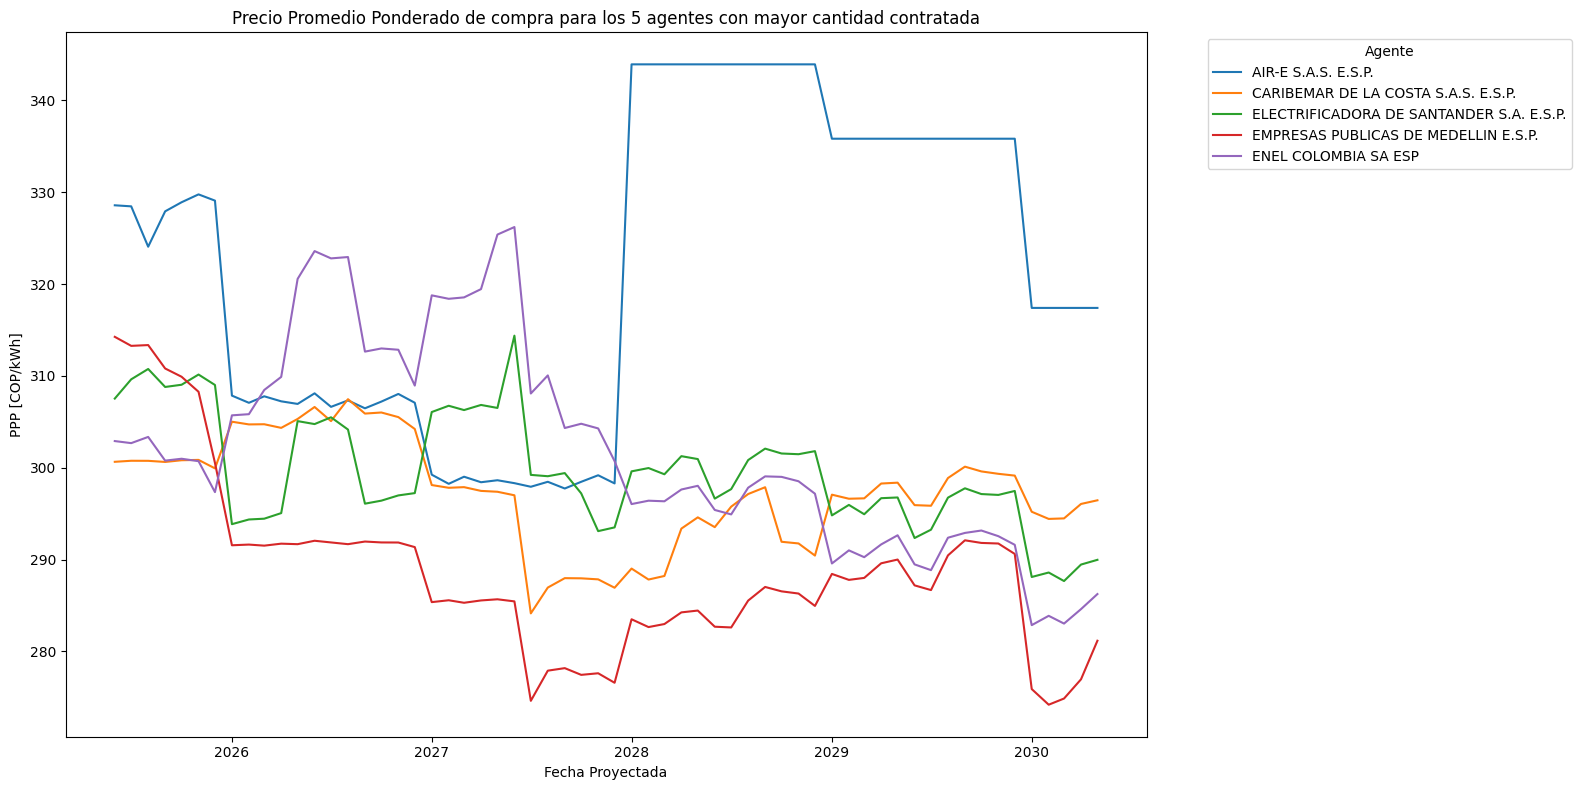

In [24]:
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df_top,
    x='FechaProyectada',
    y='PPP',
    hue='NombreAgente',
    # marker='o'
)
plt.title(f'Precio Promedio Ponderado de compra para los {num_agentes} agentes con mayor cantidad contratada')
plt.xlabel('Fecha Proyectada')
plt.ylabel('PPP [COP/kWh]')
plt.legend(title='Agente', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

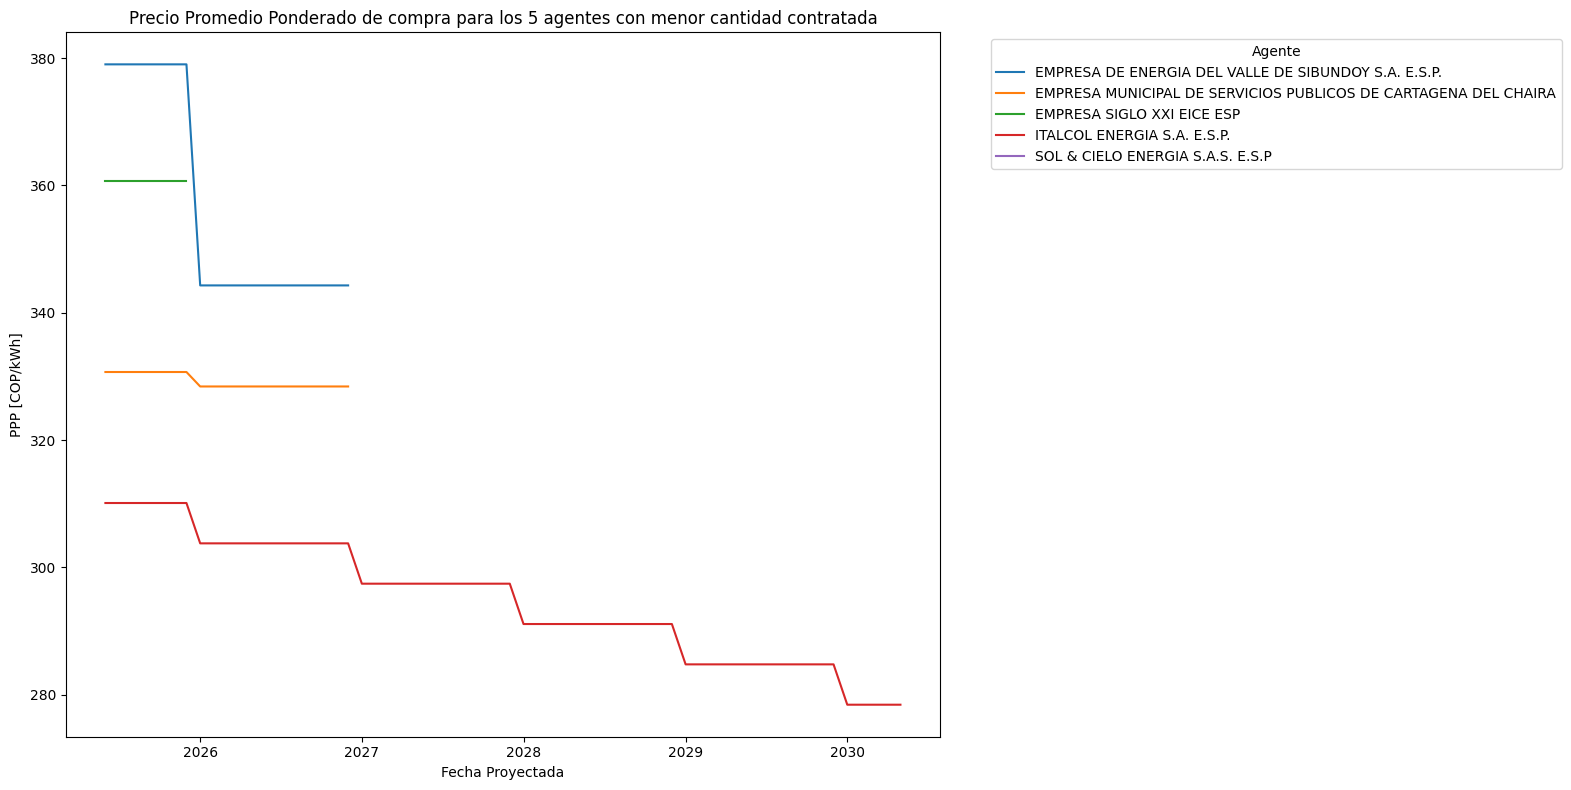

In [25]:
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df_tail,
    x='FechaProyectada',
    y='PPP',
    hue='NombreAgente',
    # marker='o'
)
plt.title(f'Precio Promedio Ponderado de compra para los {num_agentes} agentes con menor cantidad contratada')
plt.xlabel('Fecha Proyectada')
plt.ylabel('PPP [COP/kWh]')
plt.legend(title='Agente', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

*Es posible observar que los agentes con menor cantidad de energía contratada lo hacen en periodos mas cortos de tiempo y la tendencia es a un precio mas alto. Caso contrario a los agentes que contratan una mayor cantidad de energia, cuya tendencia del precio es a la baja. Además, esta cantidad tiende a ser directamente proporcional a su demanda.*

## Energía contratada por mecanismo en el mercado regulado

In [26]:
df_bar = (
    df_trabajo
    .groupby(['FechaProyectada', 'Mecanismo'])['Cantidad']
    .sum()
    .reset_index()
)

df_bar.head()

,FechaProyectada,Mecanismo,Cantidad
0,2025-06-01,Antes del SICEP,5.477717e+08
1,2025-06-01,Por fuera del SICEP,2.263356e+08
2,2025-06-01,SICEP,2.586282e+09
3,2025-07-01,Antes del SICEP,6.121955e+08
4,2025-07-01,Mecanismos de Comercialización,2.994341e+06


In [27]:
# Estructura del DataFrame para facilitar la visualización
df_pivot = df_bar.pivot(index='FechaProyectada', columns='Mecanismo', values='Cantidad').fillna(0)
df_pivot.index = pd.to_datetime(df_pivot.index)
df_pivot.head()

Mecanismo,Antes del SICEP,Mecanismos de Comercialización,Por fuera del SICEP,SICEP
FechaProyectada,,,,
2025-06-01,547771656.5,0.00,2.263356e+08,2.586282e+09
2025-07-01,612195469.0,2994340.75,2.393507e+08,2.850204e+09
2025-08-01,599313238.5,2994340.75,2.396335e+08,2.769439e+09
2025-09-01,578508829.0,2897749.25,2.511810e+08,2.760505e+09
2025-10-01,583298088.0,2994340.75,2.518295e+08,2.764014e+09


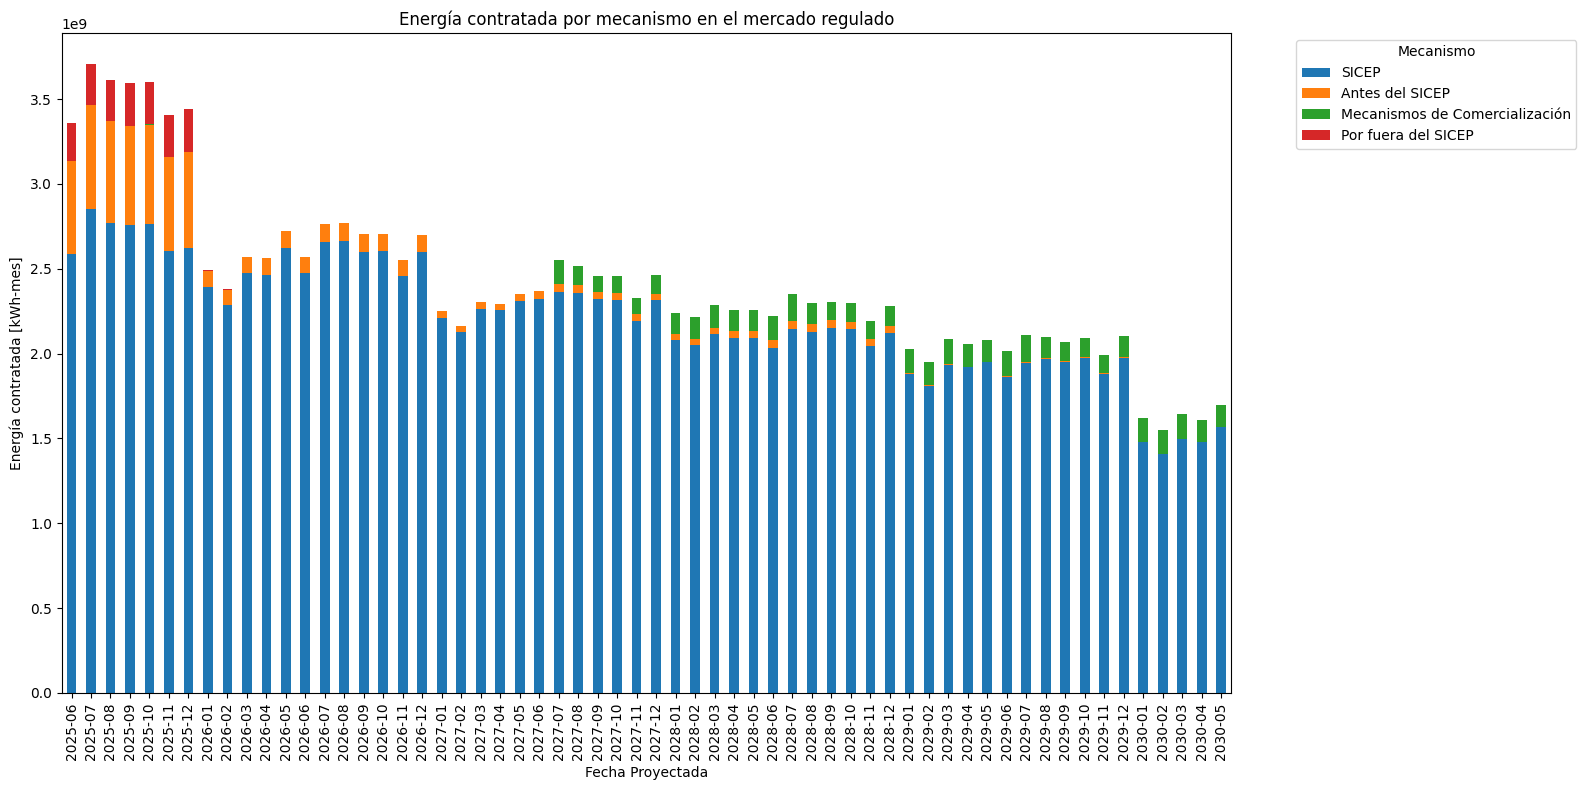

In [28]:
# Formatear el índice a "YYYY-MM"
df_pivot.index = df_pivot.index.strftime('%Y-%m')

# Ordenar mecanismos de mayor a menor cantidad total
orden_mecanismos = df_pivot.sum(axis=0).sort_values(ascending=False).index.tolist()
df_pivot = df_pivot[orden_mecanismos]

# Gráfico de barras apiladas
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(16, 8))
ax.set_title('Energía contratada por mecanismo en el mercado regulado')
ax.set_xlabel('Fecha Proyectada')
ax.set_ylabel('Energía contratada [kWh-mes]')
plt.legend(title='Mecanismo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

*Es evidente que la mayor cantidad de energía contratada a futuro en el mercado regulado se realizó a través del SICEP y los mecanismos de comercialización toman relevancia en la contratación (Ej: Derivex)*